In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "Analysis Scripts/4-5meVOutput.csv"
file2 = "Analysis Scripts/IsingOutput.csv"
file3 = "Analysis Scripts/0-0045meVOutput.csv"

latticeSizes = [40]
tertiary_CSVData = pd.read_csv(file3, sep=',', index_col=0)
secondary_CSVData = pd.read_csv(file2, sep=',', index_col=0)
global_CSVData = pd.read_csv(file, sep=',', index_col=0)
#Sixty_CSVData = pd.read_csv("0.8_60_Data.csv", sep=',', index_col=0)
#global_CSVData = pd.concat([global_CSVData, Sixty_CSVData])

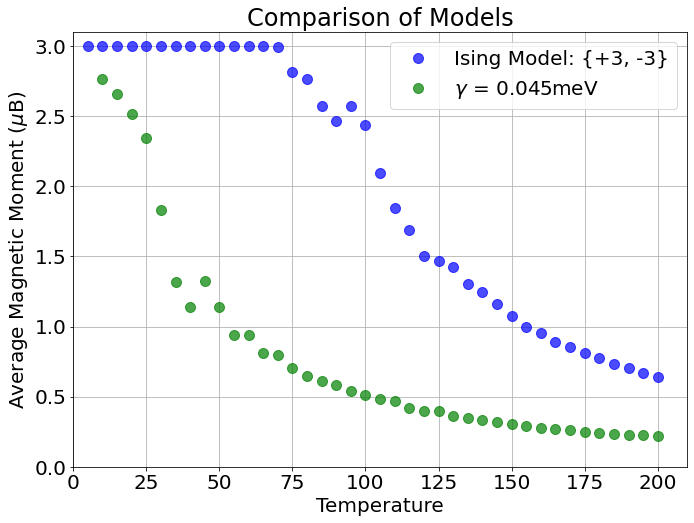

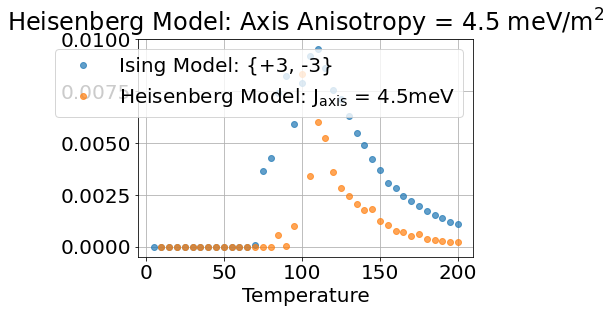

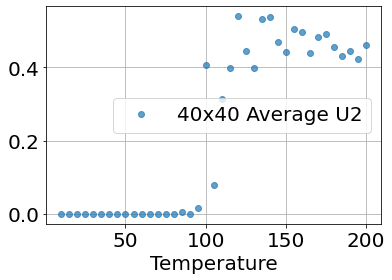

In [37]:
plt.rcParams.update({"font.size":20})

fig, ax = plt.subplots(figsize = (11,8))
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

ax.set_xlim(0, 210)
ax.set_ylim(0, 3.1)
ax.set_title(r"Comparison of Models")
ax2.set_title(r"Heisenberg Model: Axis Anisotropy = 4.5 meV/m$^2$")

ax.set_ylabel(r"Average Magnetic Moment ($\mu$B)")

for i in latticeSizes:
    secondary_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(2*i,2*i), 
                        ax=ax, grid=True, alpha=0.7, color='blue',
                        marker='o', markerfacecolor = 'blue',
                        linestyle = 'None',
                        markersize=10
                        #yerr = "{}x{} Magnetic Moment std".format(i,i),
                        #capsize = 4, color = 'black'
                      )
    
    tertiary_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(i,i), 
                        ax=ax, grid=True, alpha=0.7, color='green',
                        marker='o', markerfacecolor = 'green',
                        linestyle = 'None',
                        markersize=10
                        #yerr = "{}x{} Magnetic Moment std".format(i,i),
                        #capsize = 4, color = 'black'
                      )
    """
    global_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(i,i), 
                        ax=ax, grid=True, alpha=0.7, color='orange',
                        marker='o', markerfacecolor = 'orange',
                        linestyle = 'None',
                        markersize=10
                        #yerr = "{}x{} Magnetic Moment std".format(i,i),
                        #capsize = 4, color = 'black'
                       )
    """
    secondary_CSVData.plot(y = "{}x{} Average Susc".format(2*i,2*i), 
                        ax=ax2, grid=True, alpha=0.7,
                        marker='o', linestyle = 'None'
                       )
    global_CSVData.plot(y = "{}x{} Average Susc".format(i,i), 
                        ax=ax2, grid=True, alpha=0.7,
                        marker='o', linestyle = 'None'
                       )
    global_CSVData.plot(y = "{}x{} Average U2".format(i,i), 
                        ax=ax3, grid=True, alpha=0.7, 
                        marker='o', linestyle = 'None')
    
ax.legend(['Ising Model: {+3, -3}', r'$\gamma$ = 0.045meV'])#, r'$\gamma$ = 4.5meV'])
ax2.legend(['Ising Model: {+3, -3}', r'Heisenberg Model: J$_{\mathrm{axis}}$ = 4.5meV'])

In [100]:
file = "Analysis Scripts/80x80_spinDistTest_1.csv"
local_CSVData = pd.read_csv(file, sep=',', index_col=0)
local_CSVData.plot(grid=True, alpha=0.7, marker='o', linestyle = 'None')


KeyboardInterrupt: 